# Customer Personality Analysis

Resumo do Projeto

Este projeto utiliza o conjunto de dados Superstore Sales do Kaggle e tem o objetivo de explorar os principais KPI's, conhecer melhor as origens do faturamento entender melhor o perfil dos clientes de uma empresa. A análise busca identificar padrões de comportamento e segmentação para otimizar estratégias de marketing.

O que será feito

Importação de bibliotecas e dataset

Discorvery, limepeza e preparação dos dados

Analise Exploratórias

# Importação de bibliotecas e dataset


In [63]:
# Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Carregar o dataset 
df = pd.read_csv("Superstore Sales.csv")

# Definindo a formatação para mostrar números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format



# Discorvery, limepeza e preparação dos dados


In [65]:
# Exibir as primeiras linhas do dataset
print("Visualizando os dados:")
print(df.head(15))

Visualizando os dados:
    Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0        1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1        2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2        3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3        4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4        5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
5        6  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
6        7  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
7        8  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
8        9  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
9       10  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
10      11  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
11      12  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
12      13  CA-2018-114412  15/04/2018  20/04/2018  Standard Class 

In [66]:
# Subsistiuindo '/' identificadas em algumas linhas
df['Order Date'] = df['Order Date'].str.replace('/', '-')
print(df['Order Date'].head(15))

0     08-11-2017
1     08-11-2017
2     12-06-2017
3     11-10-2016
4     11-10-2016
5     09-06-2015
6     09-06-2015
7     09-06-2015
8     09-06-2015
9     09-06-2015
10    09-06-2015
11    09-06-2015
12    15-04-2018
13    05-12-2017
14    22-11-2016
Name: Order Date, dtype: object


In [67]:
# Informações gerais sobre o dataset
print("\nInformações sobre os dados:")
print(df.info())


Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non

In [68]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
       Row ID  Postal Code    Sales
count 9800.00      9789.00  9800.00
mean  4900.50     55273.32   230.77
std   2829.16     32041.22   626.65
min      1.00      1040.00     0.44
25%   2450.75     23223.00    17.25
50%   4900.50     58103.00    54.49
75%   7350.25     90008.00   210.61
max   9800.00     99301.00 22638.48


In [69]:
# Limpeza inicial: removendo valores ausentes
df.dropna(inplace=True)

In [70]:
# print(df['Order Date'].unique())
# print(df['Order Date'].head(20))
print(df['Order Date'].dtype)

object


In [71]:
# Convertendo a coluna de datas para o formato datetime

df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce' )

# Verificando se houve erros na conversão
print(df['Order Date'].isna().sum())
print(df['Order Date'].head(10))

0
0   2017-08-11
1   2017-08-11
2   2017-12-06
3   2016-11-10
4   2016-11-10
5   2015-09-06
6   2015-09-06
7   2015-09-06
8   2015-09-06
9   2015-09-06
Name: Order Date, dtype: datetime64[ns]


In [72]:
# Criando uma coluna com o ano e o mês para análise de tendências
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Analise Exploratórias

In [73]:
# Faturamento total
faturamento_total = df['Sales'].sum()
print(f"Faturamento Total: ${faturamento_total:,.2f}")

Faturamento Total: $2,252,607.41


In [74]:
# Ticket médio
ticket_medio = df['Sales'].mean()
print(f"Ticket Médio: ${ticket_medio:,.2f}")

Ticket Médio: $230.12


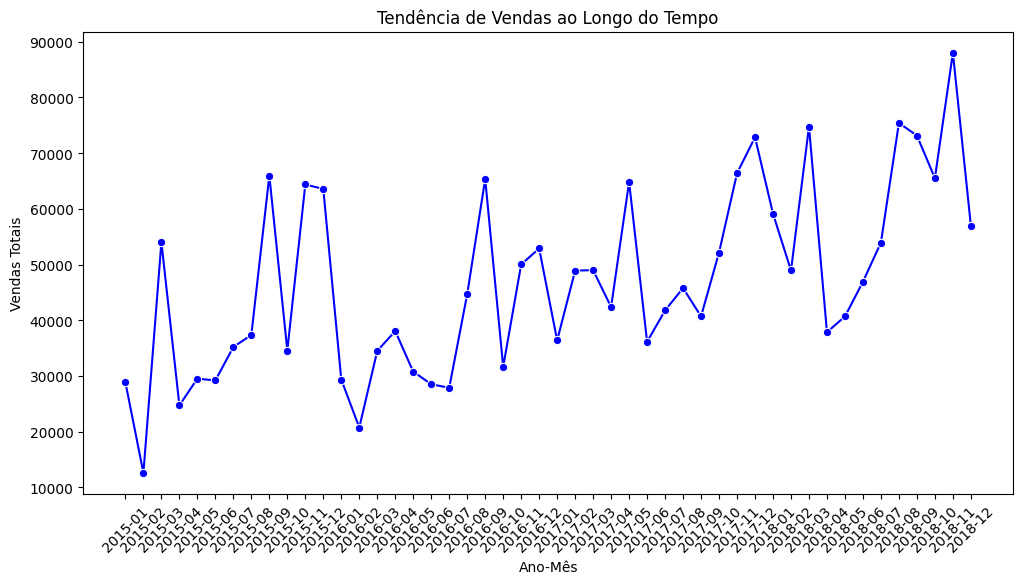

In [75]:
# Análise 1: Tendência de vendas ao longo do tempo
sales_trend = df.groupby('Year-Month')['Sales'].sum().reset_index()
sales_trend['Year-Month'] = sales_trend['Year-Month'].astype(str)  # Converte para string para facilitar o gráfico

# Visualizando a tendência de vendas
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Year-Month', y='Sales', marker='o', color='blue')
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

Vendas por Categoria:
 Category
Technology        825856.11
Furniture         723538.48
Office Supplies   703212.82
Name: Sales, dtype: float64


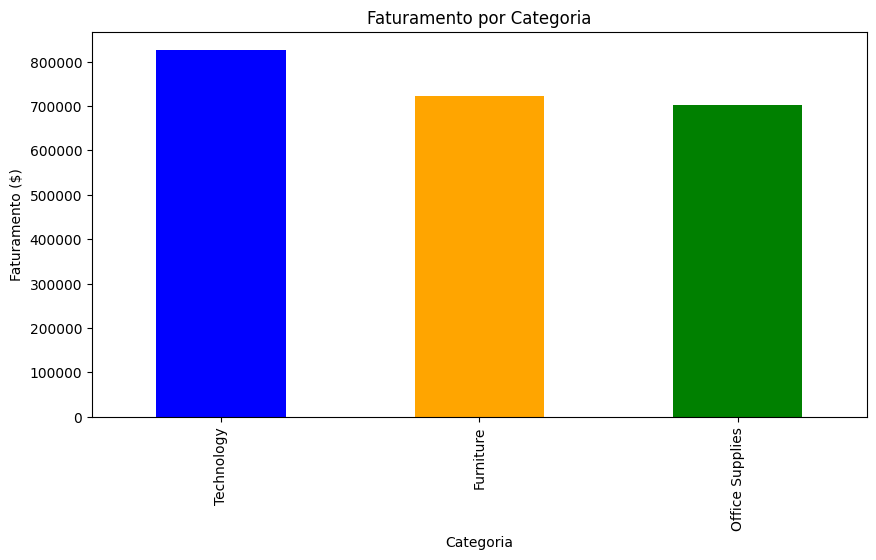

In [76]:
# Categorias mais vendidas
categoria_vendas = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Vendas por Categoria:\n", categoria_vendas)


# Gráfico de vendas por categoria
plt.figure(figsize=(10, 5))
categoria_vendas.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title("Faturamento por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Faturamento ($)")
plt.show()


Top 10 Produtos Mais Vendidos:
                                        Product Name    Sales
0              Canon imageCLASS 2200 Advanced Copier 61599.82
1  Fellowes PB500 Electric Punch Plastic Comb Bin... 27453.38
2  Cisco TelePresence System EX90 Videoconferenci... 22638.48
3       HON 5400 Series Task Chairs for Big and Tall 21870.58
4         GBC DocuBind TL300 Electric Binding System 19823.48
5   GBC Ibimaster 500 Manual ProClick Binding System 19024.50
6               Hewlett Packard LaserJet 3310 Copier 18839.69
7  HP Designjet T520 Inkjet Large Format Printer ... 18374.90
8          GBC DocuBind P400 Electric Binding System 17965.07
9        High Speed Automatic Electric Letter Opener 17030.31


C:\Users\brunoassis\AppData\Local\Temp\ipykernel_15236\2692723941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')


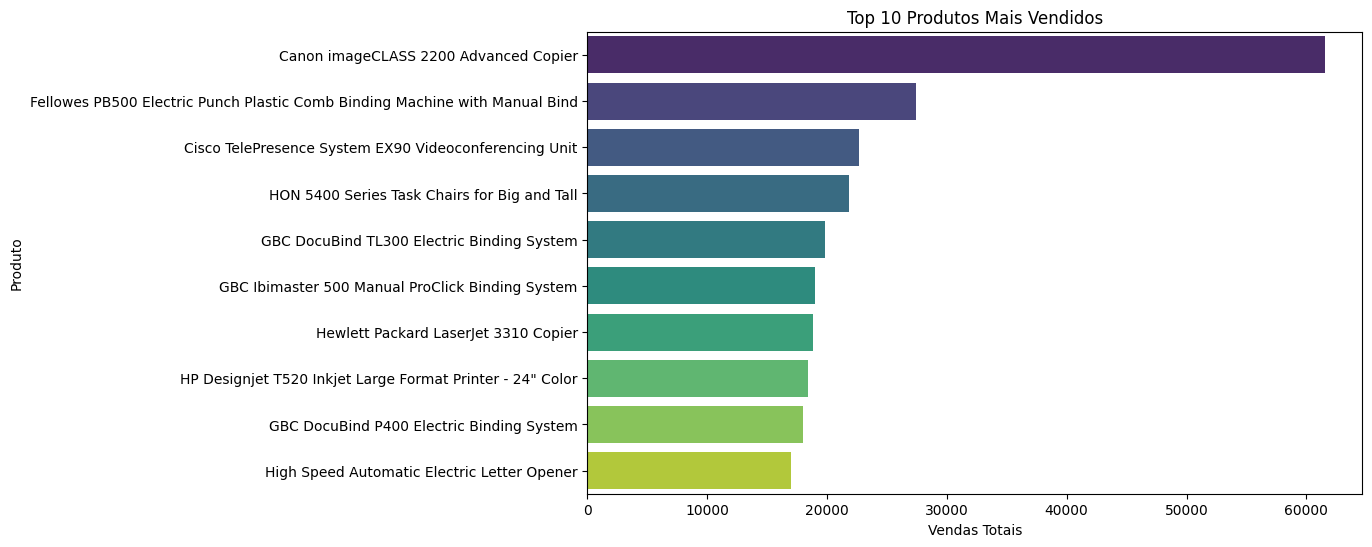

In [77]:
# Análise 3: Produtos mais vendidos (Top 10)
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

print("\nTop 10 Produtos Mais Vendidos:")
print(top_products)

# Visualizando os produtos mais vendidos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Sales', y='Product Name', palette='viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Vendas Totais')
plt.ylabel('Produto')
plt.show()



Análise de Vendas por Segmento de Cliente:
       Segment      Sales
0     Consumer 1146708.15
1    Corporate  682211.83
2  Home Office  423687.43


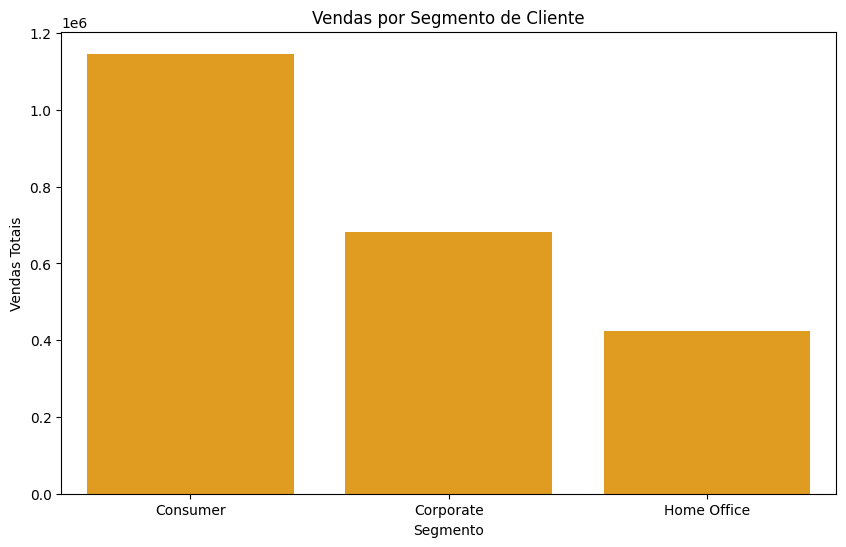

In [81]:
# Análise de vendas por segmento de cliente
segment_analysis = df.groupby('Segment')['Sales'].sum().reset_index()

print("\nAnálise de Vendas por Segmento de Cliente:")
print(segment_analysis)

# Gráfico: Vendas por segmento
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Sales', color='orange')
plt.title('Vendas por Segmento de Cliente')
plt.xlabel('Segmento')
plt.ylabel('Vendas Totais')
plt.show()



Análise ticket médio por segmento de cliente:
       Segment  Sales
0     Consumer 225.02
1    Corporate 231.42
2  Home Office 242.80


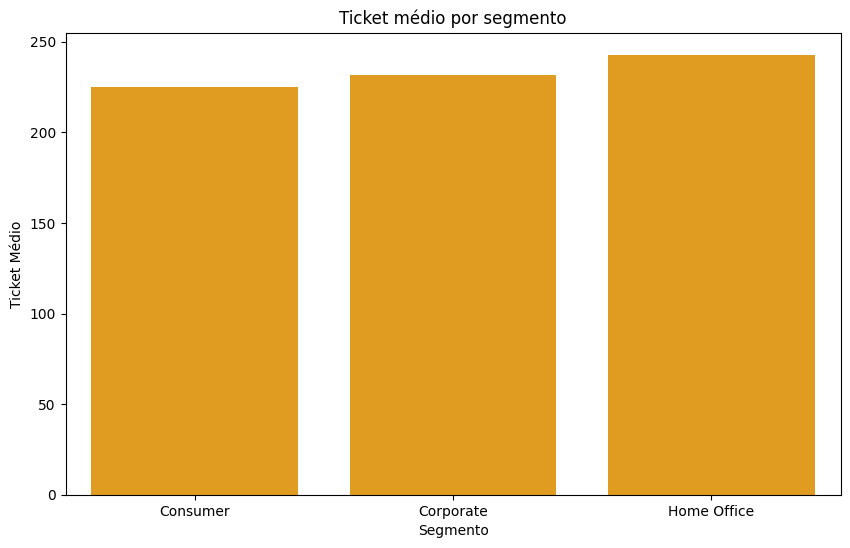

In [ ]:
# Análise Ticket médio por segmento
segment_analysis = df.groupby('Segment')['Sales'].mean().reset_index()

print("\nAnálise ticket médio por segmento de cliente:")
print(segment_analysis)

# Gráfico: Ticket médio por segmento
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='Segment', y='Sales', color='orange')
plt.title('Ticket médio por segmento')
plt.xlabel('Segmento')
plt.ylabel('Ticket Médio')
plt.show()



Análise de Vendas por Região:
    Region     Sales
0  Central 492646.91
1     East 660589.36
2    South 389151.46
3     West 710219.68


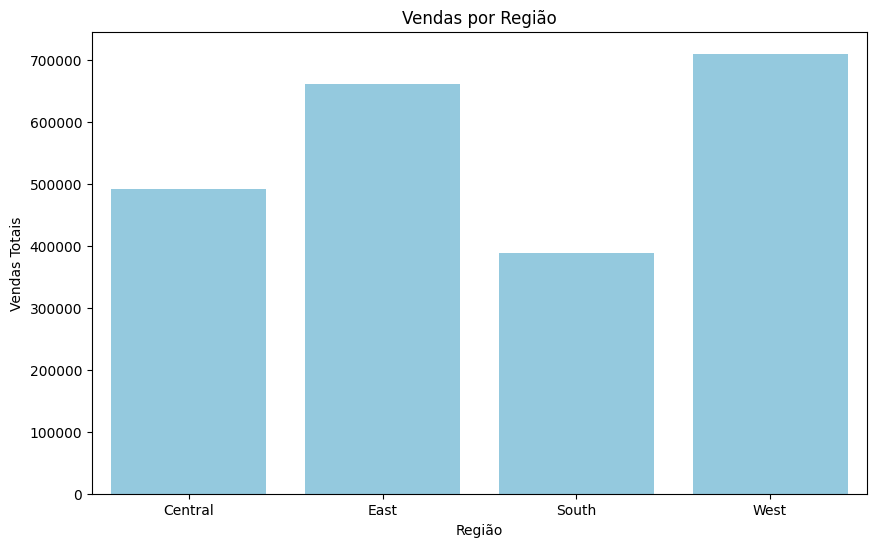

In [78]:
# Análise de vendas por região
region_analysis = df.groupby('Region')['Sales'].sum().reset_index()

print("\nAnálise de Vendas por Região:")
print(region_analysis)

# Gráfico: Vendas por região
plt.figure(figsize=(10, 6))
sns.barplot(data=region_analysis, x='Region', y='Sales', color='skyblue')
plt.title('Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.show()




Análise de Ticket Médio por Região:
    Region  Sales
0  Central 216.36
1     East 238.14
2    South 243.52
3     West 226.18


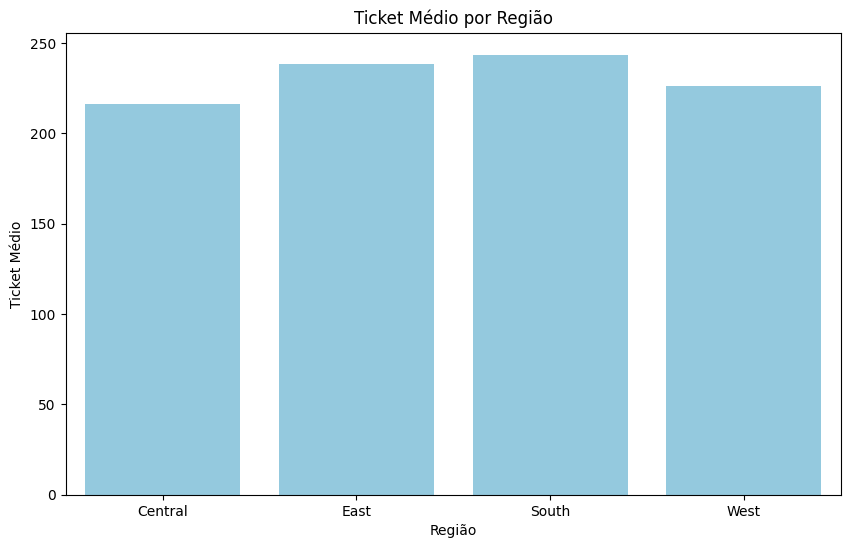

In [85]:
# Análise de Ticket Médio por região
region_analysis = df.groupby('Region')['Sales'].mean().reset_index()

print("\nAnálise de Ticket Médio por Região:")
print(region_analysis)

# Gráfico: Ticket Médio por região
plt.figure(figsize=(10, 6))
sns.barplot(data=region_analysis, x='Region', y='Sales', color='skyblue')
plt.title('Ticket Médio por Região')
plt.xlabel('Região')
plt.ylabel('Ticket Médio')
plt.show()


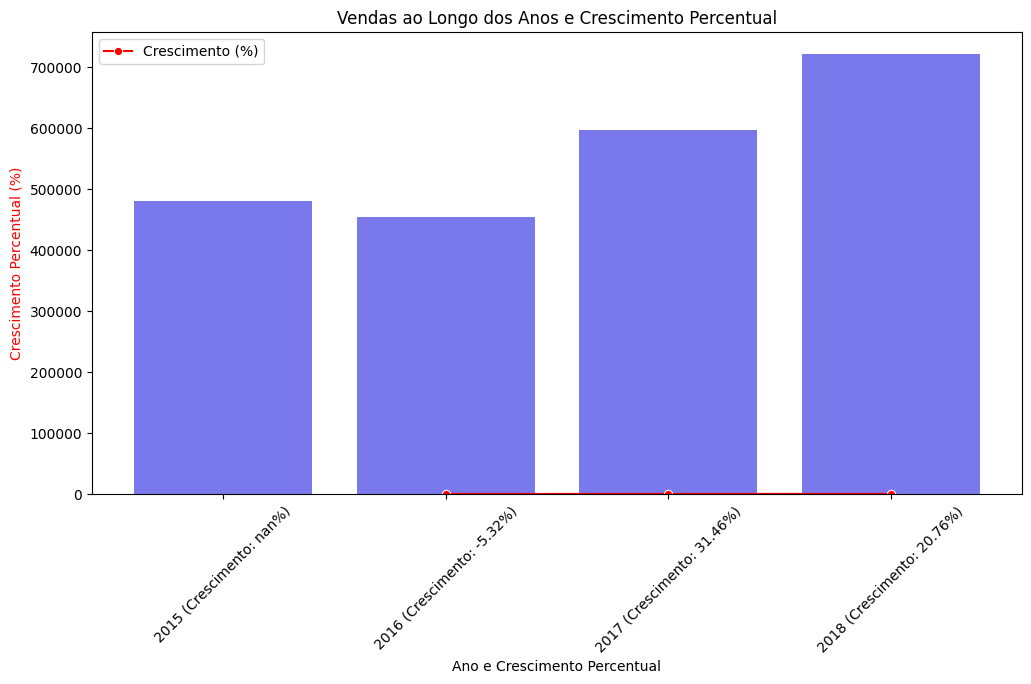

In [80]:


# Criando uma coluna com o ano
df['Year'] = df['Order Date'].dt.year

# Análise de vendas por ano
yearly_analysis = df.groupby('Year')['Sales'].sum().reset_index()

# Comparação percentual de vendas entre anos
yearly_analysis['Sales Growth (%)'] = yearly_analysis['Sales'].pct_change() * 100

# Criando uma nova coluna para combinar Ano e Crescimento Percentual
yearly_analysis['Year_Growth'] = yearly_analysis['Year'].astype(str) + ' (Crescimento: ' + yearly_analysis['Sales Growth (%)'].round(2).astype(str) + '%)'

# Gráfico: Vendas ao longo dos anos
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.barplot(data=yearly_analysis, x='Year_Growth', y='Sales', color='blue', alpha=0.6)

# Gráfico da linha de crescimento percentual
sns.lineplot(data=yearly_analysis, x='Year_Growth', y='Sales Growth (%)', color='red', marker='o', label='Crescimento (%)')

plt.title('Vendas ao Longo dos Anos e Crescimento Percentual')
plt.xlabel('Ano e Crescimento Percentual')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)  # Rotaciona as etiquetas no eixo X para melhor visualização
plt.ylabel('Crescimento Percentual (%)', color='red')
plt.legend()

plt.show()


# Conclusões e recomendações

# Conclusões:

1. O faturamento total da loja foi de aproximadamente $2,252,607.41.
2. O ticket médio por cliente é de  $230.12.
3. Ao longo dos anos, apesar de alguns meses de queda, observamos uma tendencia de crescimento no faturamento.
4. O faturamento mensal apresenta sazonalidade, com picos em determinados períodos do ano.
5. A categoria mais lucrativa é 'Technology' seguida por 'Furniture'.
6. Os produtos mais vendidos estão relacionados a itens de escritório e eletrônicos.
7. O segmento 'Consumer' representa o maior faturamento.
8. O ticket médio do segmento 'Home Office' é o maior, apesar de seu faturamento total ser o menor, o que pode significar um segmento a explorar nas campanhas de marketing.
9. O ticket médio da região 'South' é o maior, apesar de seu faturamento total ser o menor, o que pode significar uma região a explorar nas campanhas de marketing.

# Recomendações:

1. Explorar ações de marketing para perfis do segmento 'Home Office' com objetivo de alavancar o faturamento da loja.
2. Explorar ações de marketing para regiões do segmento 'South' com objetivo de alavancar o faturamento da loja.
